In [1]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
from IPython import display
import sklearn
import random
import time

import warnings
warnings.filterwarnings('ignore')


In [2]:
data_raw=pd.read_csv('titanic_train.csv')

In [3]:
data_val= pd.read_csv('titanic_test.csv')

In [62]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [5]:
data1=data_raw.copy(deep=True)

In [6]:
data_cleaner = [data1,data_val]

In [7]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
data_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


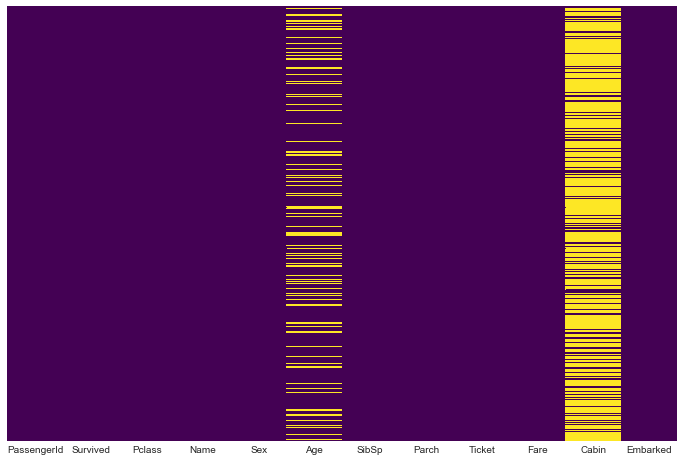

In [9]:
sns.heatmap(data1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

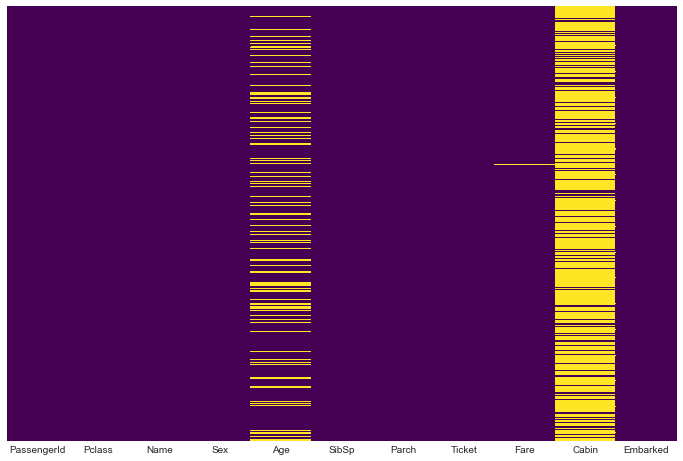

In [10]:
sns.heatmap(data_val.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
data_raw.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Adahl, Mr. Mauritz Nils Martin",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


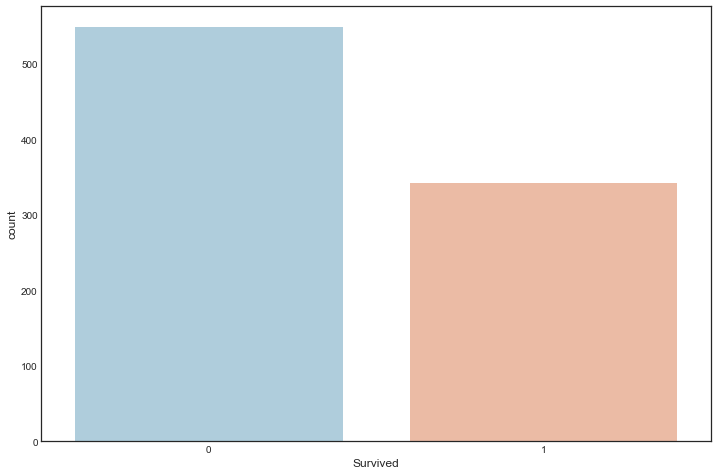

In [12]:
sns.countplot(x='Survived',data=data_raw,palette='RdBu_r')

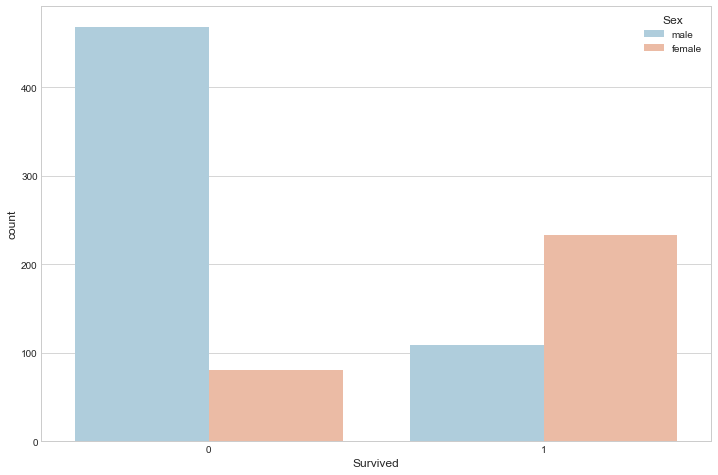

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data_raw,palette='RdBu_r')

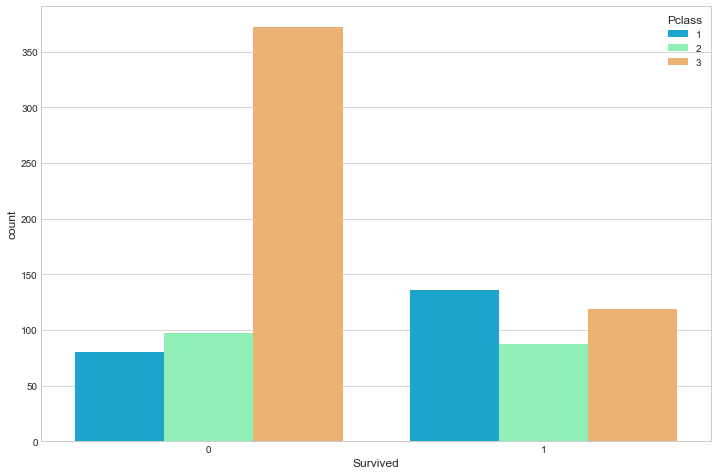

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data_raw,palette='rainbow')

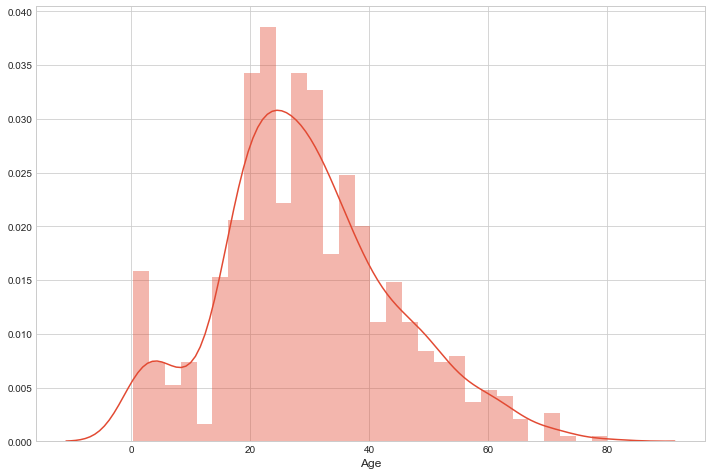

In [15]:
sns.distplot(data_raw['Age'].dropna(),kde=True,bins=30)

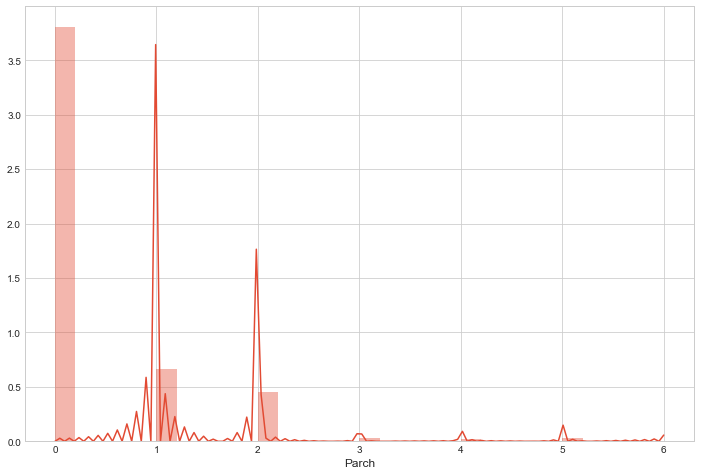

In [16]:
sns.distplot(data_raw['Parch'].dropna(),kde=True,bins=30)

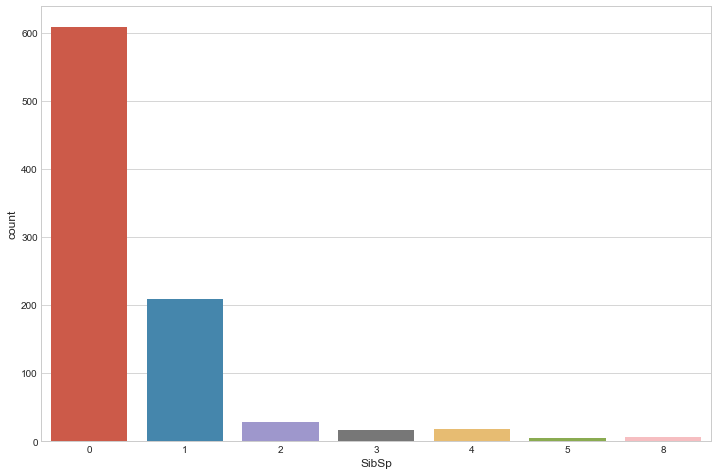

In [17]:
sns.countplot(x='SibSp',data=data_raw)

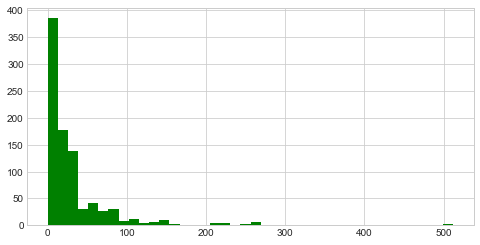

In [18]:
data_raw['Fare'].hist(color='green',bins=40,figsize=(8,4))

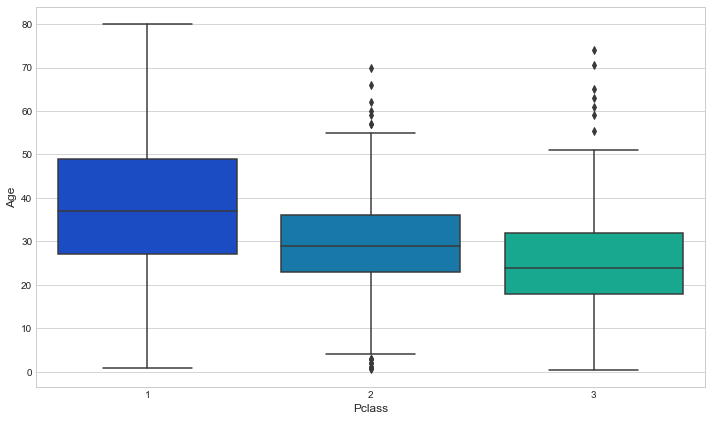

In [19]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data_raw,palette='winter')

In [20]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [21]:
data1['Age'] = data1[['Age','Pclass']].apply(impute_age,axis=1)

In [22]:
data_val['Age'] = data_val[['Age','Pclass']].apply(impute_age,axis=1)

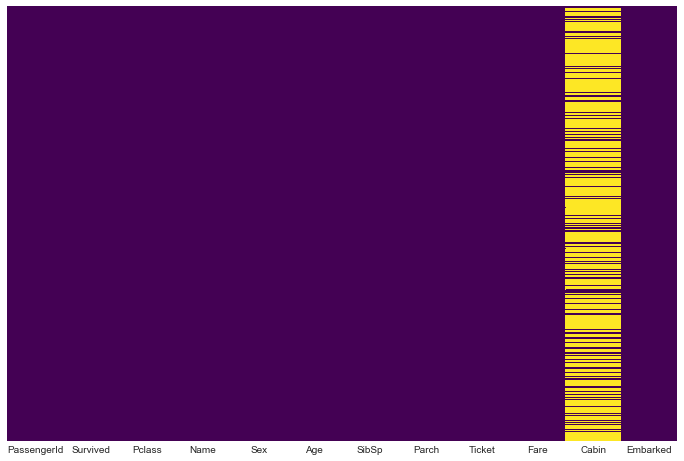

In [23]:
sns.heatmap(data1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

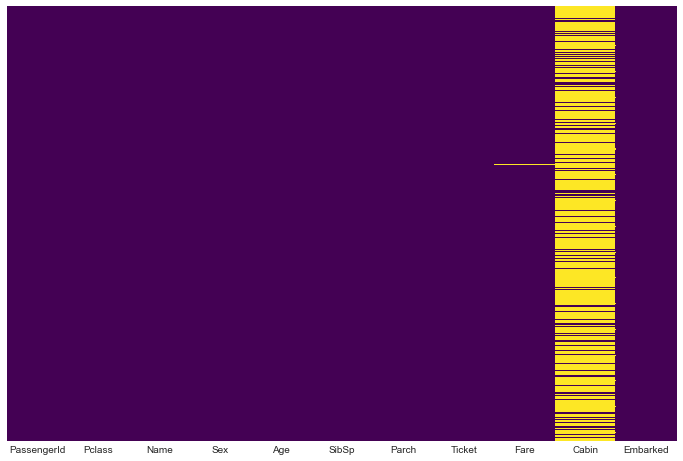

In [24]:
sns.heatmap(data_val.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
drop_column = ['PassengerId','Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace = True)

In [26]:
data1.dropna(inplace=True)
    


In [27]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Name        889 non-null object
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


In [28]:
drop_val = ['PassengerId','Cabin', 'Ticket']
data_val.drop(drop_column, axis=1, inplace = True)

In [29]:
data_val.dropna(inplace=True)

In [30]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
Pclass      417 non-null int64
Name        417 non-null object
Sex         417 non-null object
Age         417 non-null float64
SibSp       417 non-null int64
Parch       417 non-null int64
Fare        417 non-null float64
Embarked    417 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 29.3+ KB


In [31]:
###CREATE: Feature Engineering for train and test/validation dataset
for dataset in data_cleaner:    
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]



    
#cleanup rare title names
#print(data1['Title'].value_counts())
stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
title_names = (data1['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print("-"*10)

#cleanup rare title names
#print(data_val['Title'].value_counts())
stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
title_names = (data_val['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
data_val['Title'] = data_val['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data_val['Title'].value_counts())
print("-"*10)


#preview data again
data1.info()
data_val.info()
data1.sample(10)
data_val.sample(10)

Mr        517
Miss      181
Mrs       124
Master     40
Misc       27
Name: Title, dtype: int64
----------
Mr        239
Miss       78
Mrs        72
Master     21
Misc        7
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
Survived      889 non-null int64
Pclass        889 non-null int64
Name          889 non-null object
Sex           889 non-null object
Age           889 non-null float64
SibSp         889 non-null int64
Parch         889 non-null int64
Fare          889 non-null float64
Embarked      889 non-null object
FamilySize    889 non-null int64
IsAlone       889 non-null int64
Title         889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 90.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 11 columns):
Pclass        417 non-null int64
Name          417 non-null object
Sex           417 non-null object
Age     

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
272,1,"Clark, Mrs. Walter Miller (Virginia McDowell)",female,26.0,1,0,136.7792,C,2,0,Mrs
135,3,"Carlsson, Mr. Carl Robert",male,24.0,0,0,7.8542,S,1,1,Mr
131,1,"Gracie, Col. Archibald IV",male,53.0,0,0,28.5000,C,1,1,Misc
339,3,"Betros, Master. Seman",male,24.0,0,0,7.2292,C,1,1,Master
198,2,"Baimbrigge, Mr. Charles Robert",male,23.0,0,0,10.5000,S,1,1,Mr
67,1,"Moore, Mr. Clarence Bloomfield",male,47.0,0,0,42.4000,S,1,1,Mr
127,3,"McCoy, Miss. Alicia",female,24.0,2,0,23.2500,Q,3,0,Miss
194,2,"Drew, Master. Marshall Brines",male,8.0,0,2,32.5000,S,3,0,Master
265,3,"Lyntakoff, Mr. Stanko",male,24.0,0,0,7.8958,S,1,1,Mr
249,3,"Khalil, Mrs. Betros (Zahie Maria"" Elias)""",female,24.0,1,0,14.4542,C,2,0,Mrs


In [32]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

#code categorical data
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])


In [33]:
data_val.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,Sex_Code,Embarked_Code,Title_Code
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,1,Mr,1,1,3
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,0,Mrs,0,2,4
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,1,Mr,1,1,3
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,1,Mr,1,2,3
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3,0,Mrs,0,2,4


In [34]:
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,Sex_Code,Embarked_Code,Title_Code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,1,2,3
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,0,0,4
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,0,2,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,0,2,4
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,1,2,3


In [35]:
drop_column = ['Name','Embarked','Sex','Title']
data1.drop(drop_column, axis=1, inplace = True)
drop_column = ['Name','Embarked','Sex','Title']
data_val.drop(drop_column, axis=1, inplace = True)

In [36]:
data_val.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_Code,Embarked_Code,Title_Code
0,3,34.5,0,0,7.8292,1,1,1,1,3
1,3,47.0,1,0,7.0000,2,0,0,2,4
2,2,62.0,0,0,9.6875,1,1,1,1,3
3,3,27.0,0,0,8.6625,1,1,1,2,3
4,3,22.0,1,1,12.2875,3,0,0,2,4


In [37]:
data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_Code,Embarked_Code,Title_Code
0,0,3,22.0,1,0,7.2500,2,0,1,2,3
1,1,1,38.0,1,0,71.2833,2,0,0,0,4
2,1,3,26.0,0,0,7.9250,1,1,0,2,2
3,1,1,35.0,1,0,53.1000,2,0,0,2,4
4,0,3,35.0,0,0,8.0500,1,1,1,2,3


In [47]:
model=ensemble.RandomForestClassifier()

In [48]:
X=data1.drop('Survived',axis=1)
y=data1['Survived']

In [49]:
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
predictions=model.predict(data_val)

In [51]:
predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [46]:
df = pd.DataFrame(predictions)
df.to_csv("solution4.csv")